# Data cleanings

In [40]:
import pandas as pd
import re
import string

In [41]:
data_train = pd.read_csv(
    "https://raw.githubusercontent.com/Keeta-Kimila/classification-model-that-email-between-Legitimate-or-Phishing/main/dataset/train.csv"
)

data_test = pd.read_csv(
    "https://raw.githubusercontent.com/Keeta-Kimila/classification-model-that-email-between-Legitimate-or-Phishing/main/dataset/test.csv"
)



In [ ]:
data_train.head()

,Subject,Body,Label
0,An Exciting Opportunity to Engage in a Persona...,"Dear David,\n\nI hope this email finds you in ...",Legitimate
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia,\n\nWe hope this email finds you we...",Phishing
2,Important Account Notification â€“ Action Requ...,"Dear Toni, \n\nI hope this message finds you w...",Legitimate
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea,\n\nI hope this communication fin...",Legitimate
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, \n\nI hope this email finds yo...",Legitimate


## List function for Data cleaning

In [42]:
def replace_new_line_symbol(text):
    return text.replace('\n', ' ')

## Combine function into clean_data

In [43]:
def clean_data(data):
    data['Subject'] = data['Subject'].apply(replace_new_line_symbol)
    data['Body'] = data['Body'].apply(replace_new_line_symbol)
    return data

## Display Clean Data

In [44]:
data_train = clean_data(data_train)
data_test = clean_data(data_test)
data_train.head()

,Subject,Body,Label
0,An Exciting Opportunity to Engage in a Persona...,"Dear David, I hope this email finds you in th...",Legitimate
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia, We hope this email finds you well...",Phishing
2,Important Account Notification â€“ Action Requ...,"Dear Toni, I hope this message finds you wel...",Legitimate
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea, I hope this communication finds...",Legitimate
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, I hope this email finds you ...",Legitimate


# Feature Extraction base on Paper

## List function for each Feature Extraction

In [45]:
def imperative_verbs_count(text):

    pattern = r'\b(click|verify|submit|download|update)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [46]:
def clause_density(text):
  linking_words = [
    "and", "but", "or", "nor", "for", "so", "yet",
    "although", "though", "even though", "while", "whereas", "if",
    "unless", "until", "before", "after", "since", "when", "whenever",
    "where", "wherever", "because", "as", "since", "in order that",
    "so that", "that", "whether", "as if", "as though", "rather than",
    "whether or not", "however", "moreover", "furthermore", "therefore",
    "consequently", "hence", "thus", "otherwise", "indeed", "in fact",
    "for example", "for instance", "in addition", "besides", "also",
    "finally", "lastly", "first", "second", "next", "then", "afterward",
    "meanwhile", "subsequently", "otherwise", "on the other hand",
    "in contrast", "conversely", "similarly", "likewise", "as well as",
    "in conclusion", "to summarize", "in short", "above all", "namely",
    "i.e.", "e.g.", "specifically", "in particular", "on the whole", "in general"
]
  text = text.lower()
  linking_word_count = 0;punctuation_count = 0
  for word in linking_words:
      linking_word_count += len(re.findall(r'\b' + re.escape(word) + r'\b', text))

  else:
    punctuation_count = text.count('.') + text.count('!') + text.count('?')
    if punctuation_count == 0:
      punctuation_count = 1
    return (linking_word_count / (punctuation_count ))

In [47]:
def first_person_pronoun_count(text):

    pattern = r'\b(i|we)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [48]:
def pronoun_density(text):
  pronouns = [
    "i", "me", "my", "mine", "myself",
    "you", "your", "yours", "yourself",
    "he", "him", "his", "himself",
    "she", "her", "hers", "herself",
    "it", "its", "itself",
    "we", "us", "our", "ours", "ourselves",
    "they", "them", "their", "theirs", "themselves",
    "who", "whom", "whose",
    "which", "what",
    "this", "that", "these", "those",
    "everyone", "everybody", "everything",
    "someone", "somebody", "something",
    "anyone", "anybody", "anything",
    "no one", "nobody", "nothing",
    "all", "any", "both", "few", "many", "most", "several", "some", "such",
    "one", "none"
]
  text = text.lower()
  n_words = len(re.findall(r'\b\w+\b', text))
  pronoun_count = 0
  for word in pronouns:
    pronoun_count += len(re.findall(r'\b' + re.escape(word) + r'\b', text))
  if n_words == 0:
    return 0
  else:
    return pronoun_count / n_words

In [49]:
def urgency_markers_count(text):

    pattern = r'\b(urgent|asap|immediately)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [50]:
def sentence_complexity_ratio(text):
  words = [
    "and", "but", "or", "because"
]
  text = text.lower()
  words_counts = 0;punctuation_count = 0
  for word in words:
      words_counts += len(re.findall(r'\b' + re.escape(word) + r'\b', text))

  else:
    punctuation_count = text.count('.') + text.count('!') + text.count('?')
    if punctuation_count == 0:
      punctuation_count = 1
    return (words_counts / (punctuation_count ))

In [51]:
def second_person_pronoun_count(text):

    pattern = r'\b(you)\b'

    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    return len(matches)

In [52]:
def freq(text):

    pattern = r'[.,!:()/"\\-]'

    matches = re.findall(pattern, text)

    return len(matches)

In [53]:
def average_sentence_length(text):
    punctuation_count = 0; n_words = 0
    n_words = len(re.findall(r'\b\w+\b', text))
    punctuation_count = text.count('.') + text.count('!') + text.count('?')
    if punctuation_count == 0:
        punctuation_count = 1
    return n_words/punctuation_count

In [54]:
def comma_count(text):

    pattern = r'[,]'

    matches = re.findall(pattern, text)

    return len(matches)

In [55]:
def colon_count(text):

    pattern = r'[:]'

    matches = re.findall(pattern, text)

    return len(matches)

In [56]:
def semicolon_count(text):

  pattern = r'[;]'

  matches = re.findall(pattern, text)

  return len(matches)


In [57]:
def uppercase_word_ratio(text):
    text = str(text)
    tokens = re.findall(r"\b\w+\b", text)
    if len(tokens) == 0:
        return 0.0

    uppercase_words = [
        t for t in tokens
        if t.isalpha() and t.isupper() and len(t) >= 3
    ]
    return len(uppercase_words) / len(tokens)

In [58]:
def word_count(text):
    text = str(text)
    tokens = re.findall(r"\b\w+\b", text)
    return len(tokens)

In [59]:
def character_count(text):
    text = str(text)
    return len(text)

In [60]:
def average_word_lenght(data):
    return data['character_count']/data['word_count']

In [61]:
def sentence_count(text):
    text = str(text)
    sentences = re.split(r"[.!?]+", text)
    sentences = [s.strip() for s in sentences if s.strip()]
    return len(sentences)

In [62]:
def number_of_pronouns(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    pronouns = {"i", "you", "he", "she", "it", "we", "they"}
    return sum(1 for t in tokens if t in pronouns)

In [63]:
def modal_verbs_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    modal_verbs = {"can", "could", "should"}
    return sum(1 for t in tokens if t in modal_verbs)


In [64]:
def uncertainty_adverbs_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    uncertainty_words = {"maybe", "possibly", "perhaps"}
    return sum(1 for t in tokens if t in uncertainty_words)

In [65]:
def technical_jargon_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    jargon_words = {"security", "account", "update", "technical"}
    return sum(1 for t in tokens if t in jargon_words)

In [66]:
def promotional_words_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    promo_words = {"offer", "deal", "free"}
    return sum(1 for t in tokens if t in promo_words)

In [67]:
def politeness_markers_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"please", "thank", "thanks", "appreciate"}
    return sum(1 for t in tokens if t in markers)

In [68]:
def aggressiveness_markers_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"must", "now", "immediately"}
    return sum(1 for t in tokens if t in markers)

In [69]:
def conditional_phrases_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"if", "unless"}
    return sum(1 for t in tokens if t in markers)

In [70]:
def personalisation_markers_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)
    markers = {"you", "your"}
    return sum(1 for t in tokens if t in markers)

In [71]:
def number_of_emails(text):
    text = str(text)
    pattern = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b")
    return len(pattern.findall(text))

In [72]:
def label_value(text):
    if text == "Legitimate":
        return 0
    else :
        return 1

## Combine into feature_extraction function

In [73]:
def feature_extraction(data):
    data['imperative_verbs_count'] = data['Subject'].apply(imperative_verbs_count)+data['Body'].apply(imperative_verbs_count)
    data['first_person_pronoun_count'] = data['Subject'].apply(first_person_pronoun_count)+data['Body'].apply(first_person_pronoun_count)
    data['clause_density'] = data['Subject'].apply(clause_density)+data['Body'].apply(clause_density)
    data['pronoun_density'] = data['Subject'].apply(pronoun_density)+data['Body'].apply(pronoun_density)
    data['urgency_markers_count'] = data['Subject'].apply(urgency_markers_count)+data['Body'].apply(urgency_markers_count)
    data['sentence_complexity_ratio'] = data['Subject'].apply(sentence_complexity_ratio)+data['Body'].apply(sentence_complexity_ratio)
    data['second_person_pronoun_count'] = data['Subject'].apply(second_person_pronoun_count)+data['Body'].apply(second_person_pronoun_count)
    data['freq'] = data['Subject'].apply(freq)+data['Body'].apply(freq)
    data['average_sentence_length'] = data['Subject'].apply(average_sentence_length)+data['Body'].apply(average_sentence_length)
    data['comma_count'] = data['Subject'].apply(comma_count)+data['Body'].apply(comma_count)
    data['colon_count'] = data['Subject'].apply(colon_count)+data['Body'].apply(colon_count)
    data['semicolon_count'] = data['Subject'].apply(semicolon_count)+data['Body'].apply(semicolon_count)
    data['uppercase_word_ratio'] = data['Subject'].apply(uppercase_word_ratio)+data['Body'].apply(uppercase_word_ratio)
    data['word_count'] = data['Subject'].apply(word_count)+data['Body'].apply(word_count)
    data['character_count'] = data['Subject'].apply(character_count)+data['Body'].apply(character_count)
    data['average_word_lenght'] = average_word_lenght(data)
    data['sentence_count'] = data['Subject'].apply(sentence_count)+data['Body'].apply(sentence_count)
    data['number_of_pronouns'] = data['Subject'].apply(number_of_pronouns)+data['Body'].apply(number_of_pronouns)
    data['modal_verbs_count'] = data['Subject'].apply(modal_verbs_count)+data['Body'].apply(modal_verbs_count)
    data['uncertainty_adverbs_count'] = data['Subject'].apply(uncertainty_adverbs_count)+data['Body'].apply(uncertainty_adverbs_count)
    data['technical_jargon_count'] = data['Subject'].apply(technical_jargon_count)+data['Body'].apply(technical_jargon_count)
    data['promotional_words_count'] = data['Subject'].apply(promotional_words_count)+data['Body'].apply(promotional_words_count)
    data['politeness_markers_count'] = data['Subject'].apply(politeness_markers_count)+data['Body'].apply(politeness_markers_count)
    data['aggressiveness_markers_count'] = data['Subject'].apply(aggressiveness_markers_count)+data['Body'].apply(aggressiveness_markers_count)
    data['conditional_phrases_count'] = data['Subject'].apply(conditional_phrases_count)+data['Body'].apply(conditional_phrases_count)
    data['personalisation_markers_count'] = data['Subject'].apply(personalisation_markers_count)+data['Body'].apply(personalisation_markers_count)
    data['number_of_emails'] = data['Subject'].apply(number_of_emails)+data['Body'].apply(number_of_emails)
    data['label_value'] = data['Label'].apply(label_value)
    return data

## Display dataset after do feature extraction

In [74]:
data_train = feature_extraction(data_train)
data_test = feature_extraction(data_test)
data_train.head()

,Subject,Body,Label,imperative_verbs_count,first_person_pronoun_count,clause_density,pronoun_density,urgency_markers_count,sentence_complexity_ratio,second_person_pronoun_count,...,modal_verbs_count,uncertainty_adverbs_count,technical_jargon_count,promotional_words_count,politeness_markers_count,aggressiveness_markers_count,conditional_phrases_count,personalisation_markers_count,number_of_emails,label_value
0,An Exciting Opportunity to Engage in a Persona...,"Dear David, I hope this email finds you in th...",Legitimate,0,12,1.588235,0.179191,0,0.823529,14,...,1,0,2,0,4,0,1,25,0,0
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia, We hope this email finds you well...",Phishing,1,11,0.740741,0.159236,0,0.185185,14,...,1,0,0,2,4,0,2,21,1,1
2,Important Account Notification â€“ Action Requ...,"Dear Toni, I hope this message finds you wel...",Legitimate,1,10,1.666667,0.190972,1,0.800000,6,...,3,0,9,1,3,1,0,17,0,0
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea, I hope this communication finds...",Legitimate,0,13,1.421053,0.163636,0,0.684211,11,...,2,0,0,1,2,0,0,17,0,0
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, I hope this email finds you ...",Legitimate,0,12,1.375000,0.190769,0,0.750000,14,...,3,0,0,0,1,0,1,20,0,0


# Logistic Regression

In [ ]:
X_train = data_train.drop(['Subject','Body','Label','label_value'], axis=1)
X_test  = data_test.drop(['Subject','Body','Label','label_value'], axis=1)
y_train = data_train['label_value']
y_test  = data_test['label_value']



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

# ==========================
# เตรียม X_train, X_test, y_train, y_test
#  (ใช้ feature หลัง feature_extraction แล้ว)
# ==========================
X_train = data_train.drop(['Subject', 'Body', 'Label', 'label_value'], axis=1)
X_test  = data_test.drop(['Subject', 'Body', 'Label', 'label_value'], axis=1)
y_train = data_train['label_value']
y_test  = data_test['label_value']

# ==========================
# Logistic Regression + GridSearch + 5-fold CV
# ==========================

n_folds = 5

log_base = LogisticRegression(
    max_iter=1000,
    solver="liblinear",   # รองรับ l1/l2 + sparse matrix
)

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],            # ถ้าอยากลอง l1 ด้วย เพิ่ม "l1" เข้า list ได้
    "class_weight": [None, "balanced"],
}

cv = StratifiedKFold(
    n_splits=n_folds,
    shuffle=True,
    random_state=42,
)

grid_log = GridSearchCV(
    estimator=log_base,
    param_grid=param_grid,
    scoring="accuracy",   # จะเปลี่ยนเป็น 'roc_auc' ก็ได้
    cv=cv,
    n_jobs=-1,
    verbose=1,
)

# ใช้ train set หา best params
grid_log.fit(X_train, y_train)

print("===== Logistic Regression (GridSearch + CV) =====")
print("Best parameters:", grid_log.best_params_)
print("Best CV accuracy:", grid_log.best_score_)

# เอาโมเดลที่ดีที่สุดมาทดสอบบน test set
log_best = grid_log.best_estimator_

y_pred = log_best.predict(X_test)
y_prob = log_best.predict_proba(X_test)[:, 1]   # prob ของ class 1 (Phishing)

print("\nAccuracy on test:", accuracy_score(y_test, y_pred))
print("AUC (ROC-AUC) on test:", roc_auc_score(y_test, y_prob))

print("\nClassification report")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
===== Logistic Regression (GridSearch + CV) =====
Best parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
Best CV accuracy: 0.8600000000000001

Accuracy on test: 0.7692307692307693
AUC (ROC-AUC) on test: 0.8757396449704141

Classification report
              precision    recall  f1-score   support

           0     0.7333    0.8462    0.7857        13
           1     0.8182    0.6923    0.7500        13

    accuracy                         0.7692        26
   macro avg     0.7758    0.7692    0.7679        26
weighted avg     0.7758    0.7692    0.7679        26

Confusion matrix
[[11  2]
 [ 4  9]]


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1. Use a Pipeline to ensure scaling prevents data leakage
# We use class_weight='balanced' to handle potential uneven datasets
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
)

# Train
svm_pipeline.fit(X_train, y_train)

# Predict
y_pred = svm_pipeline.predict(X_test)
y_proba = svm_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("===== Support Vector Machine (Linear) =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

===== Support Vector Machine (Linear) =====
Accuracy: 0.8077
AUC: 0.8994

Classification Report:
              precision    recall  f1-score   support

           0     0.7857    0.8462    0.8148        13
           1     0.8333    0.7692    0.8000        13

    accuracy                         0.8077        26
   macro avg     0.8095    0.8077    0.8074        26
weighted avg     0.8095    0.8077    0.8074        26



/tmp/ipython-input-3656801233.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)


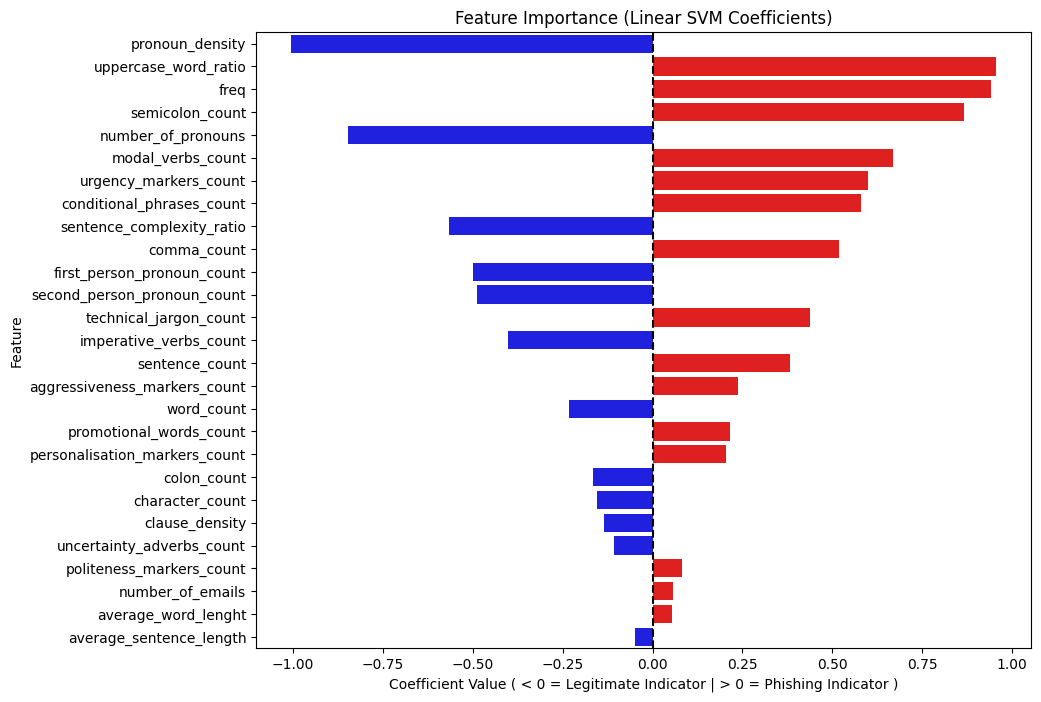

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the SVC model and the coefficients from the pipeline
# 'svc' is the automatic name given to the SVC step in make_pipeline
model_step = svm_pipeline.named_steps['svc']
coefficients = model_step.coef_[0]

# 2. Map coefficients to feature names
# If X_train is a DataFrame, use column names. If numpy, use indices.
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# 3. Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# 4. Sort by absolute value to find the most influential features overall
# (We want to see the strongest predictors, whether they are Spam OR Ham)
importance_df['Abs_Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Abs_Importance', ascending=False)

# 5. Visualization
plt.figure(figsize=(10, 8))

# Create a color mapping: Red for Spam indicators (+), Blue for Ham indicators (-)
colors = ['red' if x > 0 else 'blue' for x in importance_df['Importance']]

sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)

plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value ( < 0 = Legitimate Indicator | > 0 = Phishing Indicator )')
plt.axvline(x=0, color='black', linestyle='--') # Center line
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

# ==========================
# Random Forest + Cross-Validation
# ==========================

# โมเดล Random Forest (จะปรับพารามิเตอร์เองก็ได้)
rf_cv = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
)

# ใช้ X_train, y_train ทำ 5-fold CV
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# CV Accuracy
cv_acc = cross_val_score(
    rf_cv,
    X_train, y_train,        # <--- ใช้ X_train / y_train แทน X / y
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

# CV AUC
cv_auc = cross_val_score(
    rf_cv,
    X_train, y_train,        # <--- ใช้ X_train / y_train เหมือนกัน
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

print("===== Random Forest 5-fold CV (using train set) =====")
print("Accuracy per fold:", cv_acc)
print("Mean Accuracy:", cv_acc.mean())
print("Std Accuracy:", cv_acc.std())
print()
print("AUC per fold:", cv_auc)
print("Mean AUC:", cv_auc.mean())
print("Std AUC:", cv_auc.std())

# ==========================
# เทรนโมเดลตัวสุดท้ายบน train แล้วดูผลบน test
# ==========================

rf_final = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
)

rf_final.fit(X_train, y_train)

y_pred_rf = rf_final.predict(X_test)
y_proba_rf = rf_final.predict_proba(X_test)[:, 1]

print("\n===== Random Forest (Hold-out Test) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC (ROC-AUC):", roc_auc_score(y_test, y_proba_rf))
print("\nClassification report")
print(classification_report(y_test, y_pred_rf, digits=4))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_rf))

===== Random Forest 5-fold CV (using train set) =====
Accuracy per fold: [0.9  0.8  1.   0.85 1.  ]
Mean Accuracy: 0.9100000000000001
Std Accuracy: 0.07999999999999999

AUC per fold: [0.95 0.93 1.   0.95 1.  ]
Mean AUC: 0.966
Std AUC: 0.028705400188814633

===== Random Forest (Hold-out Test) =====
Accuracy: 0.8846153846153846
AUC (ROC-AUC): 0.9644970414201184

Classification report
              precision    recall  f1-score   support

           0     0.8571    0.9231    0.8889        13
           1     0.9167    0.8462    0.8800        13

    accuracy                         0.8846        26
   macro avg     0.8869    0.8846    0.8844        26
weighted avg     0.8869    0.8846    0.8844        26

Confusion matrix
[[12  1]
 [ 2 11]]


# XGBoost

## Training Find best parameters

In [75]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

# ----------------------------
# 1) Prepare X and y
# ----------------------------
X_train = data_train.drop(["label_value","Subject","Body","Label"], axis=1)
y_train = data_train["label_value"]

X_test = data_test.drop(["label_value","Subject","Body","Label"], axis=1)
y_test = data_test["label_value"]

# ----------------------------
# 2) Hyperparameter Search Space
# ----------------------------
param_grid = {
    "max_depth": [int(i) for i in range(2,10)],
    "n_estimators": [int(i) for i in range(51,402) if i%2==1],
    "learning_rate": [int(i)*0.01 for i in range(1,11)]
}

# ----------------------------
# 3) XGBoost Base Model
# ----------------------------
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# ----------------------------
# 4) StratifiedKFold for CV
# ----------------------------
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# ----------------------------
# 5) GridSearchCV
# ----------------------------
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=skf,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Best model
best_model = grid.best_estimator_

Fitting 5 folds for each of 14080 candidates, totalling 70400 fits
Best Parameters: {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 319}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:53:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Save Model

In [ ]:
best_model.save_model('xgboost_model.bin')

## Load Model xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
best_model = xgb.XGBClassifier()
best_model.load_model('xgboost_model.bin')
# ----------------------------
# 6) Predict using best model
# ----------------------------
X_train = data_train.drop(["label_value","Subject","Body","Label"], axis=1)
y_train = data_train["label_value"]

X_test = data_test.drop(["label_value","Subject","Body","Label"], axis=1)
y_test = data_test["label_value"]

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Probability Target:{y_pred_proba}")
print(f"Label test data:{y_pred}")

# ----------------------------
# 7) Metrics
# ----------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

# ----------------------------
# 8) Print results
# ----------------------------
print("=== XGBoost Evaluation Results (Best Model) ===")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1-Score       : {f1:.4f}")
print(f"AUC-Score      : {auc:.4f}")
print("\nConfusion Matrix:")
print(cm)

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1124: UserWarning: [16:31:00] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `bin`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)


Probability Target:[0.01300209 0.05245703 0.0788151  0.97523546 0.01170991 0.67415655
 0.08601129 0.96671563 0.91353697 0.8675618  0.87623954 0.9609004
 0.31296337 0.05181819 0.0078209  0.11040487 0.00814284 0.4617905
 0.30325338 0.67295194 0.90841955 0.62402064 0.01944051 0.7723695
 0.01131255 0.89155066]
Label test data:[0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1]
=== XGBoost Evaluation Results (Best Model) ===
Accuracy       : 0.9615
Precision      : 1.0000
Recall         : 0.9231
F1-Score       : 0.9600
AUC-Score      : 0.9645

Confusion Matrix:
[[13  0]
 [ 1 12]]


## Which feature that Importance for prediction?


=== Feature Importance (Gain) ===
                          feature  importance_gain
4           urgency_markers_count        10.529953
0          imperative_verbs_count         7.971666
5       sentence_complexity_ratio         4.412775
10                    colon_count         4.350098
7                            freq         3.257950
2                  clause_density         2.953995
16         technical_jargon_count         2.649407
15             number_of_pronouns         2.175838
1      first_person_pronoun_count         2.053823
14                 sentence_count         1.911571
3                 pronoun_density         1.802849
8         average_sentence_length         1.681952
6     second_person_pronoun_count         1.523370
11           uppercase_word_ratio         1.005355
9                     comma_count         0.776419
13                character_count         0.658903
12                     word_count         0.646259
18  personalisation_markers_count         0.355

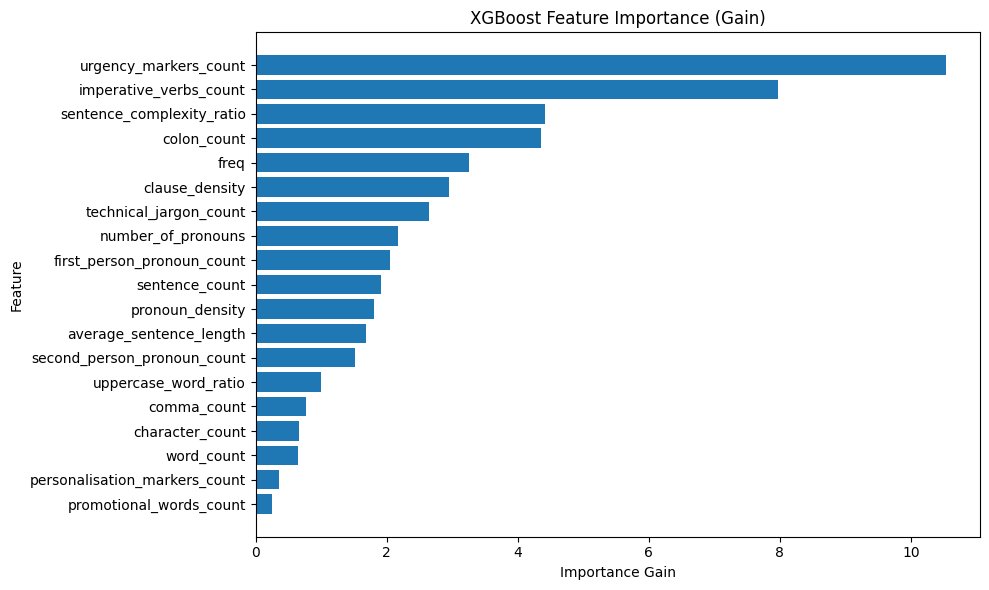

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 9) Feature Importance (Gain)
# ----------------------------
# 'best_model' and 'X_train' are assumed to be defined earlier

importance = best_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
# MODIFICATION: Use the keys directly, as they appear to be feature names
importance_df = pd.DataFrame({
    'feature': list(importance.keys()), # Use the key directly as the feature name
    'importance_gain': importance.values()
}).sort_values(by='importance_gain', ascending=False)

print("\n=== Feature Importance (Gain) ===")
print(importance_df)

# ----------------------------
# 10) Plot Feature Importance
# ----------------------------
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance_gain'])
plt.gca().invert_yaxis()  # high importance on top
plt.title("XGBoost Feature Importance (Gain)")
plt.xlabel("Importance Gain")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Add on Feature Extraction

## List new Feature Extraction

In [ ]:
def url_count(text):
    text = str(text)
    pattern = re.compile(
        r"(https?://\S+|www\.\S+|\b\S+\.(com|net|org|info|biz|co|io|xyz)\b)",
        re.IGNORECASE
    )
    return len(pattern.findall(text))

In [ ]:
def currency_symbol_count(text):
    text = str(text)
    pattern = re.compile(r"[$€£¥฿]")
    return len(pattern.findall(text))

In [ ]:
def spam_keyword_count(text):
    text = str(text).lower()
    tokens = re.findall(r"\b\w+\b", text)

    spam_keywords = {
        "free", "win", "winner", "prize", "bonus",
        "lottery", "cash", "credit", "offer", "deal"
    }

    return sum(1 for t in tokens if t in spam_keywords)

In [ ]:
def digit_char_ratio(text):
    text = str(text)
    chars = [c for c in text if not c.isspace()]
    if len(chars) == 0:
        return 0.0
    digit_chars = [c for c in chars if c.isdigit()]
    return len(digit_chars) / len(chars)

In [ ]:
def average_word_lenght_by_part(text):
    text = str(text)
    tokens = re.findall(r"\b\w+\b", text)
    if not tokens:
        return 0.0
    total_chars = sum(len(t) for t in tokens)
    return total_chars / len(tokens)

## Combine new Feature into Feature in Paper

In [ ]:
def new_feature(data):
    data['url_count'] = data['Subject'].apply(url_count)+data['Body'].apply(url_count)
    data['currency_symbol_count'] = data['Subject'].apply(currency_symbol_count)+data['Body'].apply(currency_symbol_count)
    data['spam_keyword_count'] = data['Subject'].apply(spam_keyword_count)+data['Body'].apply(spam_keyword_count)
    data['digit_char_ratio'] = data['Subject'].apply(digit_char_ratio)+data['Body'].apply(digit_char_ratio)
    data['average_word_lenght_Subjects'] = data['Subject'].apply(average_word_lenght_by_part)
    data['average_word_lenght_Body'] = data['Body'].apply(average_word_lenght_by_part)
    return data

In [ ]:
data_train = new_feature(data_train)
data_test = new_feature(data_test)
data_train.head()

,Subject,Body,Label,imperative_verbs_count,first_person_pronoun_count,clause_density,pronoun_density,urgency_markers_count,sentence_complexity_ratio,second_person_pronoun_count,...,conditional_phrases_count,personalisation_markers_count,number_of_emails,label_value,url_count,currency_symbol_count,spam_keyword_count,digit_char_ratio,average_word_lenght_Subjects,average_word_lenght_Body
0,An Exciting Opportunity to Engage in a Persona...,"Dear David, I hope this email finds you in th...",Legitimate,0,12,1.588235,0.179191,0,0.823529,14,...,1,25,0,0,0,5,0,0.000000,5.700000,4.994220
1,New Exciting Relationship Opportunity! From Lo...,"Dear Julia, We hope this email finds you well...",Phishing,1,11,0.740741,0.159236,0,0.185185,14,...,2,21,1,1,1,0,2,0.005928,7.571429,4.821656
2,Important Account Notification â€“ Action Requ...,"Dear Toni, I hope this message finds you wel...",Legitimate,1,10,1.666667,0.190972,1,0.800000,6,...,0,17,0,0,0,1,1,0.004030,7.166667,5.076389
3,Exclusive Financial Opportunity Awaits - Inves...,"Dear Chelsea, I hope this communication finds...",Legitimate,0,13,1.421053,0.163636,0,0.684211,11,...,0,17,0,0,0,0,1,0.000000,8.714286,5.527273
4,Introducing Groundbreaking Health Enhancement ...,"Dear Christine, I hope this email finds you ...",Legitimate,0,12,1.375000,0.190769,0,0.750000,14,...,1,20,0,0,0,2,0,0.000000,11.000000,5.104615


# Choose Best Model and add new Feature Extraction

##KNN+MLP

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

# ==========================
# ตั้งค่า KNN และ MLP (ให้ตรงกับที่ใช้บน test set)
# ==========================
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    n_jobs=-1
)

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

models_cv = {
    "KNN (k=5)": knn,
    "MLP Neural Net": mlp
}

# ใช้ StratifiedKFold เพื่อรักษาสัดส่วน class
cv = StratifiedKFold(
    n_splits=5,          # จะเปลี่ยนเป็น 10 ก็ได้
    shuffle=True,
    random_state=42
)

for name, clf in models_cv.items():
    print("=" * 60)
    print(f"{name} - 5-fold Cross-Validation")
    print("=" * 60)

    # ---------- 1) Cross-Validation บน train set ----------
    acc_scores = cross_val_score(
        clf,
        X_train, y_train,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )

    auc_scores = cross_val_score(
        clf,
        X_train, y_train,
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    print("Accuracy per fold:", acc_scores)
    print("Mean Accuracy:", acc_scores.mean())
    print("Std Accuracy:", acc_scores.std())
    print()
    print("AUC per fold:", auc_scores)
    print("Mean AUC:", auc_scores.mean())
    print("Std AUC:", auc_scores.std())
    print()

    # ---------- 2) เทรนบน train + แสดง confusion matrix บน test ----------
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    print(f"{name} - Hold-out Test Result")
    print("Accuracy on test:", accuracy_score(y_test, y_pred))
    print("AUC (ROC-AUC) on test:", roc_auc_score(y_test, y_proba))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report")
    print(classification_report(y_test, y_pred, digits=4))
    print("\n\n")


KNN (k=5) - 5-fold Cross-Validation
Accuracy per fold: [0.65 0.7  0.65 0.65 0.6 ]
Mean Accuracy: 0.65
Std Accuracy: 0.031622776601683784

AUC per fold: [0.74 0.77 0.66 0.76 0.82]
Mean AUC: 0.7499999999999999
Std AUC: 0.05215361924162121

KNN (k=5) - Hold-out Test Result
Accuracy on test: 0.5384615384615384
AUC (ROC-AUC) on test: 0.5710059171597633

Confusion Matrix:
[[9 4]
 [8 5]]

Classification report
              precision    recall  f1-score   support

           0     0.5294    0.6923    0.6000        13
           1     0.5556    0.3846    0.4545        13

    accuracy                         0.5385        26
   macro avg     0.5425    0.5385    0.5273        26
weighted avg     0.5425    0.5385    0.5273        26




MLP Neural Net - 5-fold Cross-Validation
Accuracy per fold: [0.85 0.8  0.55 0.95 0.8 ]
Mean Accuracy: 0.79
Std Accuracy: 0.13190905958272917

AUC per fold: [0.91 0.83 0.54 1.   0.98]
Mean AUC: 0.8520000000000001
Std AUC: 0.16702095676890372

MLP Neural Net - Hold

## roberta-base (LM)

### Install pakage

In [ ]:
pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.8/330.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 119.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=b72ca48d357bebb12d917d94050d78f9a8d87b80ccae308452f83ee3c4d61df7
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


### Prepare Dataset

In [ ]:
data_train = pd.read_csv(
    "https://raw.githubusercontent.com/Keeta-Kimila/classification-model-that-email-between-Legitimate-or-Phishing/main/dataset/train.csv"
)

data_test = pd.read_csv(
    "https://raw.githubusercontent.com/Keeta-Kimila/classification-model-that-email-between-Legitimate-or-Phishing/main/dataset/test.csv"
)
data_train = clean_data(data_train)
data_test = clean_data(data_test)

In [ ]:
def combine_text(row):
    return f"{row['Subject']} {row['Body']}"

In [ ]:
data_train['text'] = data_train.apply(combine_text, axis=1)
data_test['text'] = data_test.apply(combine_text, axis=1)
data_train['labels'] = data_train['Label'].apply(label_value)
data_test['labels'] = data_test['Label'].apply(label_value)
train_data = data_train.drop(["Subject","Body","Label"], axis=1)
eval_data = data_test.drop(["Subject","Body","Label"], axis=1)
train_df = pd.DataFrame(train_data, columns=["text", "labels"])
eval_df = pd.DataFrame(eval_data, columns=["text", "labels"])

### Training Model

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging
import numpy as np

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

target_Performant = 0.96
min_improvement = 0.01

prev_Performant = 0
attempt = 1

while True:
    print(f"\n=== Training Attempt #{attempt} ===")

    model_args = ClassificationArgs(
        num_train_epochs=5,
        overwrite_output_dir=True,
        output_dir=f"roberta_model_{attempt}",
    )

    # Create and train model
    model = ClassificationModel(
        "roberta",
        "roberta-base",
        args=model_args
    )

    # Train
    model.train_model(train_df)

    # Evaluate
    result, model_outputs, wrong_predictions = model.eval_model(eval_df)
    Performant = result.get("accuracy", None)
    print(f"Attempt {attempt} accuracy = {Performant}")

    # --- SAVE MODEL HERE ---
    save_path = f"roberta_model_{attempt}"
    model.save_model(save_path)
    model.tokenizer.save_pretrained(save_path)
    print(f"Model saved to: {save_path}")
    # -------------------------

    # Stop condition 1: high enough performance
    if Performant is not None and Performant > target_Performant:
        print("Stopping: accuracy reached target value.")
        break

    # Stop condition 2: improvement too small
    improvement = Performant - prev_Performant
    print(f"Improvement: {improvement}")

    if improvement < min_improvement and (Performant > target_Performant):
        print("Stopping: Improvement is too small.")
        break

    # Update for next loop
    prev_Performant = Performant
    attempt += 1

### Load Model

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
model_load_final = ClassificationModel("roberta", f"roberta_model_1")

### Evaluate

In [ ]:
result, model_outputs, wrong_predictions = model_load_final.eval_model(eval_df)

In [ ]:
print(f"Accuracy: {float(result['accuracy'])}")
print(f"Precision: {result['tp']/(result['tp']+result['fp'])}")
print(f"Recall: {result['tp']/(result['tp']+result['fn'])}")
print(f"F1-score: {float(result['f1_score'])}")
print(f"AUC: {float(result['auroc'])}")
print(f"""Confusion Matrix:
{np.array([[int(result['tp']),int(result['fp'])],[int(result['fn']),int(result['tn'])]])}""")